In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Create a larger sample dataset
# 10 observations with 3 features: Height (cm), Weight (kg), Age (years)
data = np.array([
    [170, 70, 30],
    [165, 65, 28],
    [175, 80, 35],
    [160, 60, 25],
    [180, 85, 40],
    [172, 72, 32],
    [168, 68, 29],
    [177, 82, 37],
    [162, 62, 26],
    [182, 87, 42]
])

In [2]:
# Step 2: Standardize the data
mean = np.mean(data, axis=0)
std = np.std(data, axis=0, ddof=1)
X_std = (data - mean) / std

# Step 3: Compute the covariance matrix
n = X_std.shape[0]
cov_matrix = (1 / (n - 1)) * np.dot(X_std.T, X_std)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 5: Select principal components (top 2 for 2D projection)
k = 2
top_eigenvectors = eigenvectors[:, :k]

# Step 6: Project the data
X_transformed = np.dot(X_std, top_eigenvectors)

# Step 7: Calculate variance explained
total_variance = np.sum(eigenvalues)
variance_explained = (eigenvalues / total_variance) * 100

In [3]:
# Print results
print("Original Dataset (10 observations, 3 features):")
print(data)
print("\nStandardized Data:")
print(X_std)
print("\nCovariance Matrix:")
print(cov_matrix)
print("\nEigenvalues (sorted descending):")
print(eigenvalues)
print("\nEigenvectors (corresponding to sorted eigenvalues):")
print(eigenvectors)
print("\nTransformed Data (reduced to 2 dimensions):")
print(X_transformed)
print("\nPercentage of Variance Explained by Each Component:")
for i, var in enumerate(variance_explained):
    print(f"PC{i+1}: {var:.2f}%")
print("\nCumulative Variance Explained:")
for i, cum_var in enumerate(np.cumsum(variance_explained)):
    print(f"Top {i+1} PCs: {cum_var:.2f}%")

Original Dataset (10 observations, 3 features):
[[170  70  30]
 [165  65  28]
 [175  80  35]
 [160  60  25]
 [180  85  40]
 [172  72  32]
 [168  68  29]
 [177  82  37]
 [162  62  26]
 [182  87  42]]

Standardized Data:
[[-0.14715436 -0.31733038 -0.40866895]
 [-0.81603779 -0.82915356 -0.74922641]
 [ 0.52172908  0.706316    0.44272469]
 [-1.48492123 -1.34097675 -1.26006259]
 [ 1.19061252  1.21813919  1.29411834]
 [ 0.12039902 -0.1126011  -0.06811149]
 [-0.41470773 -0.52205965 -0.57894768]
 [ 0.78928245  0.91104527  0.78328215]
 [-1.21736785 -1.13624748 -1.08978386]
 [ 1.45816589  1.42286846  1.63467579]]

Covariance Matrix:
[[1.         0.99038066 0.98609163]
 [0.99038066 1.         0.99082824]
 [0.98609163 0.99082824 1.        ]]

Eigenvalues (sorted descending):
[2.9782019  0.01391942 0.00787869]

Eigenvectors (corresponding to sorted eigenvalues):
[[-0.5770141  -0.72398348  0.37802467]
 [-0.57793491  0.03488918 -0.81533673]
 [-0.57710136  0.68893444  0.43854687]]

Transformed Data (re

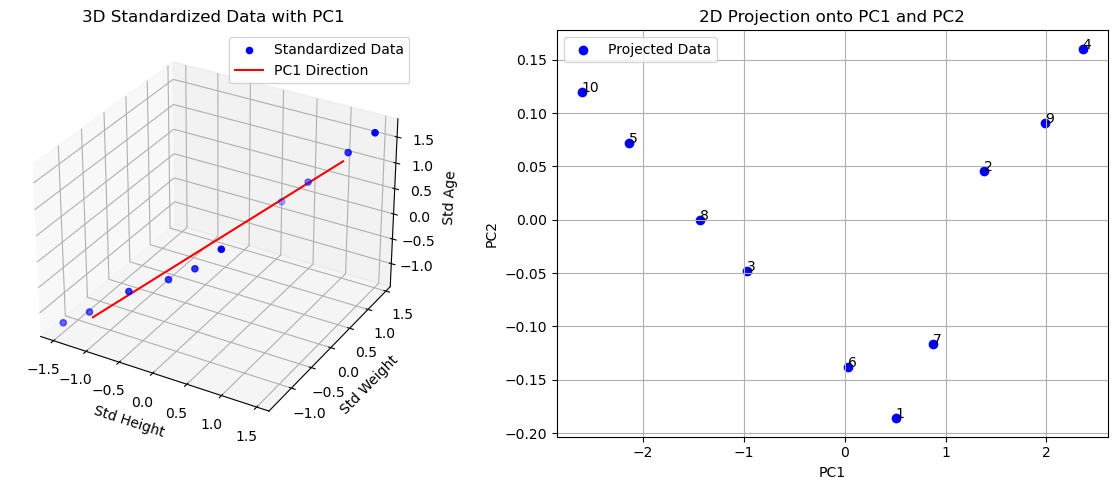

In [4]:
# Step 8: Visualize
# 3D Scatter Plot of Standardized Data with PC1 Direction
fig = plt.figure(figsize=(12, 5))

# 3D Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_std[:, 0], X_std[:, 1], X_std[:, 2], c='blue', label='Standardized Data')

# Plot PC1 direction (scaled for visibility)
t = np.linspace(-2, 2, 100)
pc1 = eigenvectors[:, 0]
line = np.array([t * pc1[0], t * pc1[1], t * pc1[2]]).T
ax1.plot(line[:, 0], line[:, 1], line[:, 2], 'r-', label='PC1 Direction')

ax1.set_xlabel('Std Height')
ax1.set_ylabel('Std Weight')
ax1.set_zlabel('Std Age')
ax1.set_title('3D Standardized Data with PC1')
ax1.legend()

# 2D Scatter Plot of Transformed Data
ax2 = fig.add_subplot(122)
ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], c='blue', label='Projected Data')
for i, txt in enumerate(range(1, 11)):
    ax2.annotate(txt, (X_transformed[i, 0], X_transformed[i, 1]))
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('2D Projection onto PC1 and PC2')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()